Top 3 Most Profitable Products:
PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64


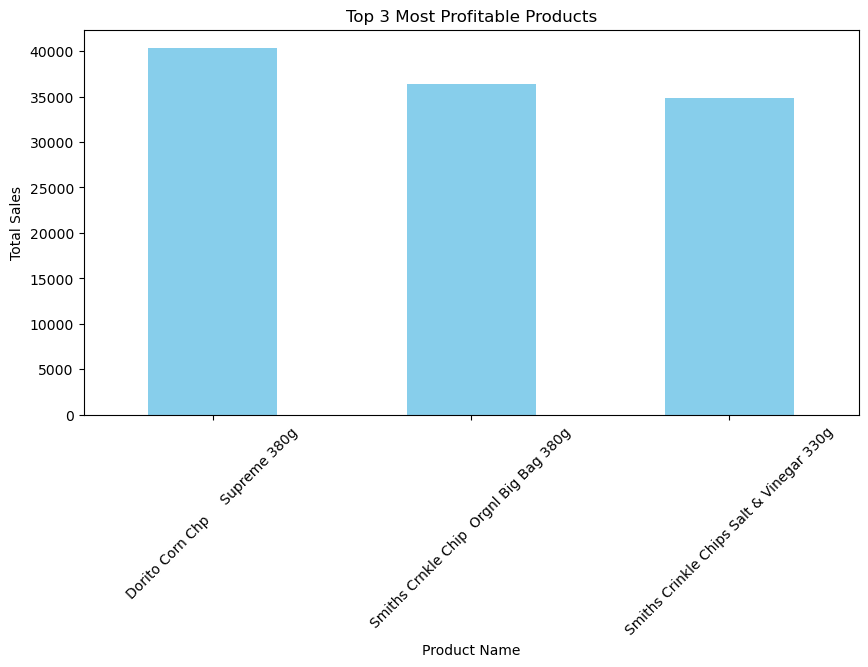


Most Loyal Customers (Top 10 by Number of Transactions):
LYLTY_CARD_NBR
172032    18
162039    18
230078    17
128178    17
13138     17
116181    17
222242    16
94185     16
113080    16
109036    16
Name: count, dtype: int64

Characteristics of Most Loyal Customers:
LIFESTAGE
OLDER FAMILIES           5
YOUNG FAMILIES           3
OLDER SINGLES/COUPLES    1
YOUNG SINGLES/COUPLES    1
Name: count, dtype: int64
PREMIUM_CUSTOMER
Mainstream    6
Premium       3
Budget        1
Name: count, dtype: int64


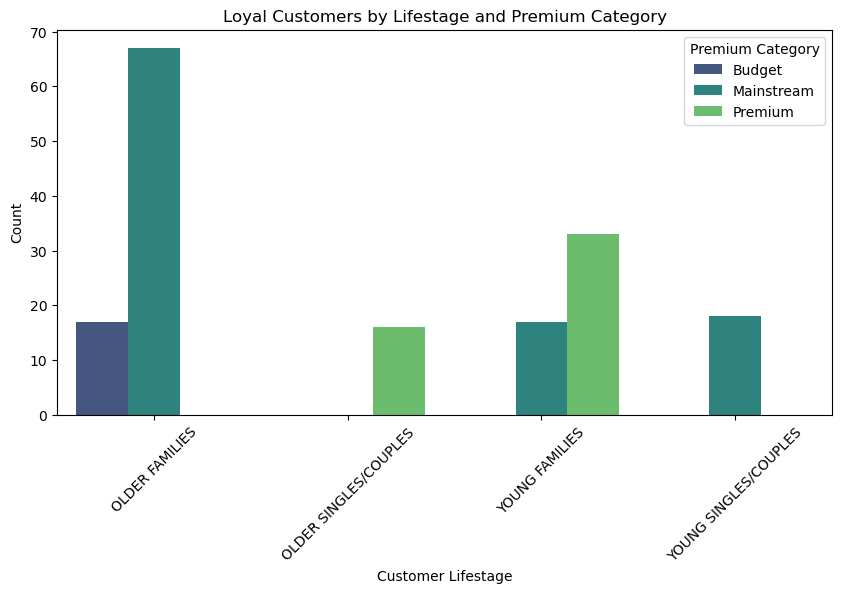

In [39]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV files
df_transactions = pd.read_csv ("transaction_data.csv")
df_purchase = pd.read_csv("purchase_behaviour.csv")

# Convert DATE column to datetime format
df_transactions["DATE"] = pd.to_datetime(df_transactions["DATE"], origin="1899-12-30", unit="D")

# Merge transaction and customer data on LYLTY_CARD_NBR
df = df_transactions.merge(df_purchase, on="LYLTY_CARD_NBR", how="left")

# Identify the Top 3 Most Profitable Products
top_products = df.groupby("PROD_NAME")["TOT_SALES"].sum().sort_values(ascending=False).head(3)

# Print Top 3 Most Profitable Products
print("Top 3 Most Profitable Products:")
print(top_products)

# Visualizing the top 3 products
plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Identify the Most Loyal Customers (by number of transactions)
loyal_customers = df["LYLTY_CARD_NBR"].value_counts().head(10)

# Print Most Loyal Customers
print("\nMost Loyal Customers (Top 10 by Number of Transactions):")
print(loyal_customers)

# Analyzing Loyal Customer Characteristics
loyal_data = df[df["LYLTY_CARD_NBR"].isin(loyal_customers.index)]
customer_profile = loyal_data.groupby("LYLTY_CARD_NBR")[["LIFESTAGE", "PREMIUM_CUSTOMER"]].first()

# Print Customer Profile Insights
print("\nCharacteristics of Most Loyal Customers:")
print(customer_profile["LIFESTAGE"].value_counts())
print(customer_profile["PREMIUM_CUSTOMER"].value_counts())

# Visualizing Loyal Customer Segments
plt.figure(figsize=(10,5))
sns.countplot(x=loyal_data["LIFESTAGE"], hue=loyal_data["PREMIUM_CUSTOMER"], palette="viridis")
plt.title('Loyal Customers by Lifestage and Premium Category')
plt.xticks(rotation=45)
plt.xlabel("Customer Lifestage")
plt.ylabel("Count")
plt.legend(title="Premium Category")
plt.show()


# Hypothesis

Why Loyal Customers Prefer These Products – Our Hypothesis
Brand Trust & Recognition:

Customers repeatedly buy from trusted brands like Doritos and Smiths Crinkle Chips because of their consistent quality and taste.
Lifestage Influence:

Young Families may prefer family-sized packs for group consumption.
Older Singles/Couples might gravitate toward premium and healthier options.
Premium Buyers Drive Loyalty:

A significant portion of loyal customers are Premium/Mainstream buyers, suggesting they prioritize quality over price.
Impact of Promotions & Discounts:

Bulk buying behavior indicates that discounts and Buy One Get One (BOGO) offers encourage repeat purchases.
Convenience & Habit:

These products are likely widely available, making them an easy and habitual choice for shoppers.

Conclusion
Loyal customers choose trusted brands, larger packs, and premium products. Promotions and convenience also play a role in their buying decisions.
